<a href="https://colab.research.google.com/github/anagjurchinova/DataScience_2025/blob/main/Hockey-Teams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [1]:
pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 22.3 MB/s eta 0:00:00


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Configuration

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [4]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [35]:
# Navigate to a web page.
baseurl = 'https://www.scrapethissite.com/pages/forms/'
browser.get(baseurl)

In [6]:
# Print the page source code.
print(browser.page_source)

<html lang="en"><head>
    <meta charset="utf-8">
    <title>Hockey Teams: Forms, Searching and Pagination | Scrape This Site | A public sandbox for learning web scraping</title>
    <link rel="icon" type="image/png" href="/static/images/scraper-icon.png">

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="description" content="Browse through a database of NHL team stats since 1990. Practice building a scraper that handles common website interface components.">

    <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" rel="stylesheet" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" crossorigin="anonymous">
    <link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css">
    <link rel="stylesheet" type="text/css" href="/static/css/styles.css">

    
<meta name="robots"

In [9]:
# Select an element from the page.
element = browser.find_element(By.TAG_NAME, 'a')

In [10]:
# Print the element's innner text.
print(element.text)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://www.scrapethissite.com/pages/forms/. The task includes the extraction of **hockey team names** and their **wins** and **losses** in the respective **year** for a minimum of 25 hockey teams. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of wins and losses in the year 1990.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [39]:
# Write your code here.
table = browser.find_element(By.TAG_NAME, 'table')

team_names = table.find_elements(By.CLASS_NAME, 'name')
team_wins = table.find_elements(By.CLASS_NAME, 'wins')
team_losses = table.find_elements(By.CLASS_NAME, 'losses')
team_years = table.find_elements(By.CLASS_NAME, 'year')

print(len(team_names), len(team_wins), len(team_losses), len(year))

25 25 25 25


In [40]:
# Add as many code boxes as you need.
data = []
for name, wins, losses, year in zip(team_names, team_wins, team_losses, team_years):
  data.append([name.text, wins.text, losses.text, year.text])

df = pd.DataFrame(data, columns=['Team name', 'Total wins', 'Total losses', 'Team Year'])
df

,Team name,Total wins,Total losses,Team Year
0,Boston Bruins,44,24,1990
1,Buffalo Sabres,31,30,1990
2,Calgary Flames,46,26,1990
3,Chicago Blackhawks,49,23,1990
4,Detroit Red Wings,34,38,1990
5,Edmonton Oilers,37,37,1990
6,Hartford Whalers,31,38,1990
7,Los Angeles Kings,46,24,1990
8,Minnesota North Stars,27,39,1990
9,Montreal Canadiens,39,30,1990


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Team name     25 non-null     object
 1   Total wins    25 non-null     object
 2   Total losses  25 non-null     object
 3   Team Year     25 non-null     object
dtypes: object(4)
memory usage: 928.0+ bytes


In [19]:
df['Total wins'] = df['Total wins'].astype(int)
df['Total losses'] = df['Total losses'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Team name     25 non-null     object
 1   Total wins    25 non-null     int64 
 2   Total losses  25 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


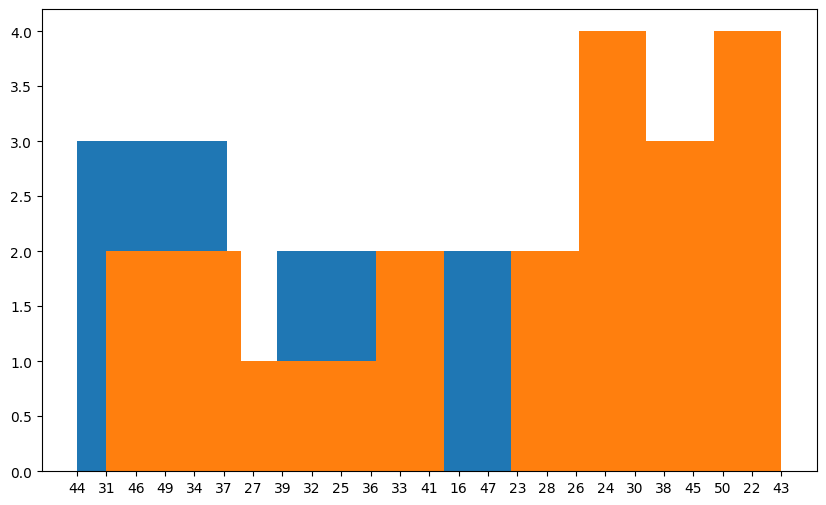

In [43]:
filtered_data = df[df['Team Year'] == '1990']

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.figure(figsize=(10,6))
plt.hist(filtered_data['Total wins'],bins=10)
plt.hist(filtered_data['Total losses'],bins=10)
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

In the context of scraping the website https://www.scrapethissite.com/pages/forms/, the additional task involves searching for the hockey team 'Boston Bruins' using the available search field. You will extract the wins and losses data for this team covering the years from 1990 to 2011. After gathering this information, your task is to create a line plot where the wins and losses of the 'Boston Bruins' team are visualized across the years, displaying both trends on the same plot.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [46]:
# Write your code here.
if(browser.current_url != baseurl):
  browser.get(baseurl)

search = browser.find_element(By.ID,'q')
search.send_keys("Boston Bruins")
search.submit()
# print(browser.current_url)

table = browser.find_element(By.TAG_NAME, 'table')
boston_wins = table.find_elements(By.CLASS_NAME, 'wins')
boston_losses = table.find_elements(By.CLASS_NAME, 'losses')
boston_years = table.find_elements(By.CLASS_NAME, 'year')
boston_data = []

for year, wins, losses in zip(boston_years, boston_wins, boston_losses):
  boston_data.append([year.text, wins.text, losses.text])

bostonDf = pd.DataFrame(boston_data, columns=['Year', 'Wins', 'Losses'])
bostonDf

,Year,Wins,Losses
0,1990,44,24
1,1991,36,32
2,1992,51,26
3,1993,42,29
4,1994,27,18
5,1995,40,31
6,1996,26,47
7,1997,39,30
8,1998,39,30
9,1999,24,33


In [47]:
bostonDf['Wins'] = bostonDf['Wins'].astype(int)
bostonDf['Losses'] = bostonDf['Losses'].astype(int)

bostonDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    21 non-null     object
 1   Wins    21 non-null     int64 
 2   Losses  21 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 632.0+ bytes


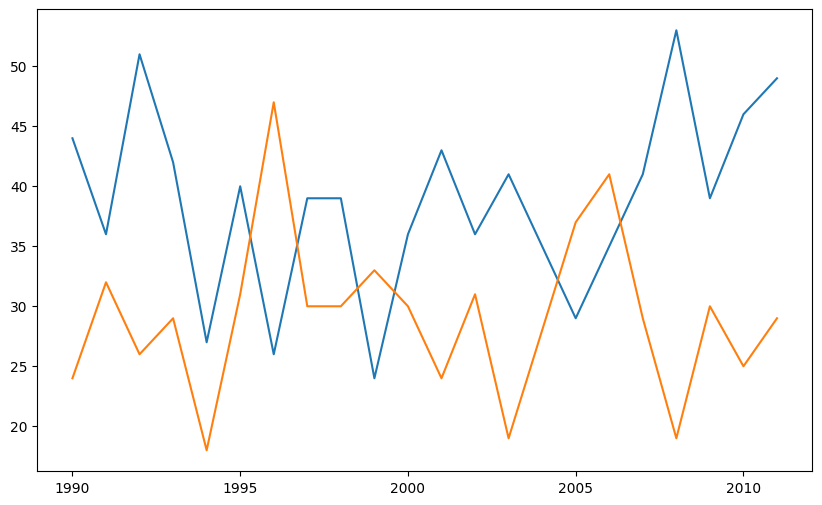

In [49]:
bostonDf['Year'] = bostonDf['Year'].astype(int)

plt.figure(figsize=(10,6))
plt.plot(bostonDf['Year'],bostonDf['Wins'])
plt.plot(bostonDf['Year'],bostonDf['Losses'])
plt.show()